# Part I - Airline On-Time Performance Data
## by Stephanie Truchan

## Introduction
> "This database contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS)."

> Source: https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D

> This data covers the years 1987 - 2008. It also includes information about airport codes, airplanes models, carriers and variable descriptions

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.legend_handler import HandlerBase
#from matplotlib.text import Text
import seaborn as sb
import os
import glob
from datetime import datetime

%matplotlib inline

### Gather Data


In [2]:
pd.set_option('display.max_columns', None)

# Get a feel for what is in a single year's file
test_df = pd.read_csv('2008.csv')
test_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU,LIT,393,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU,MCO,848,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [4]:
# See what values are possible for "Cancelled"
test_df.Cancelled.value_counts()

0    2324775
1      64442
Name: Cancelled, dtype: int64

In [5]:
# Get a feel for what is in the airports file
airports_df = pd.read_csv('airports.csv')
airports_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [6]:
# Get info on datatypes and # of entries for airports
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [7]:
# Get a feel for what is in the carriers file
carriers_df = pd.read_csv('carriers.csv')
# Get a feel for what is in the carriers file
carriers_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [8]:
# Get info on datatypes and # of entries for carriers
# Get a feel for what is in the carriers file
carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [9]:
# Get a feel for what is in the plane-data file
plane_data_df = pd.read_csv('plane-data.csv')
plane_data_df.tail(100)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
4929,N970AT,Corporation,BOEING,01/24/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
4930,N970DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,12/14/2007,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990
4931,N970EV,Corporation,BOMBARDIER INC,08/23/2001,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
4932,N970SW,Corporation,BOMBARDIER INC,01/05/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2003
4933,N971AT,Corporation,BOEING,01/29/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [10]:
# Get info on datatypes and # of entries for plane-data
plane_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [11]:
# See what is in the variable-descriptions file
variable_desc_df = pd.read_csv('variable-descriptions.csv')
variable_desc_df

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


### Flight data is contained in multiple csv files with the year as the file name.
#### We will programmtically read each in and combine a sample from them into a single dataframe

In [117]:
# Based on code from: 
# https://www.business-science.io/python/2021/09/21/python-read-csv.html
# https://stackoverflow.com/questions/23735529/how-to-use-glob-to-read-limited-set-of-files-with-numeric-names

# Get the current working directory path
path = os.getcwd()

# Create a list to capture file names
all_files=[]

# Look in current directory for csv files with a numeric name and add the file name to all_files
for filename in os.listdir(path):
    basename, ext = os.path.splitext(filename)
    if ext != '.csv':
        continue # not a csv file
    try:
        number = int(basename)
    except ValueError:
        continue  # not numeric
    all_files.append(filename)
    
# Instantiate list to hold dfs
li=[]
# Using a For-Loop, read in files and add them to a list of dataframes
# Specify encoding due to unicode error
# Specify dtypes due to low memory error for Pandas guessing what they should be. Due to several NaNs, floats were used rather than int 
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='latin-1',
                    dtype={'Year': int, 'Month': int, 'DayofMonth': int, 'DayofWeek': int,
                           'DepTime': float, 'CRSDepTime': float, 'ArrTime': float, 'CRSArrTime': float,
                           'UniqueCarrier': 'str', 'FlightNum': 'str', 'TailNum': 'str', 
                           'ActualElapsedTime': float, 'CRSElapsedTime':float, 'AirTime':float, 
                           'ArrDelay': float, 'DepDelay': float, 'Origin': 'str', 'Dest': 'str',
                           'Distance': float, 'TaxiIn': float, 'TaxiOut': float, 'Cancelled': 'category', 
                           'CancellationCode': 'category', 'Diverted': 'category', 'CarrierDelay': float,
                           'WeatherDelay': float, 'NASDelay': float, 'SecurityDelay': float, 
                           'LateAircraftDelay': float})
    # Due to the size of the dataset, take a sample from each dataframe
    # https://knowledge.udacity.com/questions/780971
    df_sample = df.sample(20000)
    li.append(df_sample)
    
# Combine into one dataframe    
li[1]
combined_flight_data = pd.concat(li, axis=0, ignore_index=True)

In [119]:
# Take a quick look at the results
combined_flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1990,8,11,6,1612.0,1525.0,1747.0,1710.0,US,506,NaN,95.0,105.0,NaN,37.0,47.0,PWM,PIT,555.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1990,11,28,3,1621.0,1620.0,1737.0,1724.0,US,473,NaN,76.0,64.0,NaN,13.0,1.0,CLE,IND,261.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1990,7,15,7,617.0,617.0,709.0,707.0,TW,390,NaN,52.0,50.0,NaN,2.0,0.0,PIA,STL,137.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1990,10,6,6,1221.0,1222.0,1245.0,1250.0,DL,1617,NaN,84.0,88.0,NaN,-5.0,-1.0,SLC,PHX,507.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1990,1,24,3,2101.0,2051.0,2231.0,2223.0,AA,950,NaN,90.0,92.0,NaN,8.0,10.0,RDU,PVD,566.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [120]:
# Get info on datatypes and # of entries for the combined sample of annual flight data
combined_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440000 entries, 0 to 439999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               440000 non-null  int64   
 1   Month              440000 non-null  int64   
 2   DayofMonth         440000 non-null  int64   
 3   DayOfWeek          440000 non-null  int64   
 4   DepTime            431846 non-null  float64 
 5   CRSDepTime         440000 non-null  float64 
 6   ArrTime            430798 non-null  float64 
 7   CRSArrTime         440000 non-null  float64 
 8   UniqueCarrier      440000 non-null  object  
 9   FlightNum          440000 non-null  object  
 10  TailNum            279431 non-null  object  
 11  ActualElapsedTime  430798 non-null  float64 
 12  CRSElapsedTime     439903 non-null  float64 
 13  AirTime            273264 non-null  float64 
 14  ArrDelay           430798 non-null  float64 
 15  DepDelay           431846 non-null

In [121]:
# Check for rows where there is ArrTime is null but Cancelled = 0
combined_flight_data[(combined_flight_data['ArrTime'].isnull()) & (combined_flight_data['Cancelled'] == '0')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
169,1990,12,19,3,1053.0,1025.0,NaN,1055.0,WN,711,NaN,NaN,150.0,NaN,NaN,28.0,SAT,LAS,1069.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
198,1990,6,1,5,1659.0,1705.0,NaN,1823.0,AA,346,NaN,NaN,78.0,NaN,NaN,-6.0,MOB,BNA,385.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
406,1990,1,15,1,1113.0,1030.0,NaN,1315.0,HP,1255,NaN,NaN,105.0,NaN,NaN,43.0,SMF,PHX,647.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
911,1990,8,3,5,1538.0,1537.0,NaN,1729.0,AA,869,NaN,NaN,112.0,NaN,NaN,1.0,RDU,MCO,534.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
1896,1990,7,19,4,1256.0,1257.0,NaN,1630.0,AA,1052,NaN,NaN,213.0,NaN,NaN,-1.0,SAT,ORD,1041.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438617,1989,8,23,3,1433.0,1200.0,NaN,1229.0,UA,853,NaN,NaN,29.0,NaN,NaN,153.0,BHM,HSV,74.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
438720,1989,10,4,3,804.0,801.0,NaN,1144.0,TW,196,NaN,NaN,163.0,NaN,NaN,3.0,STL,BOS,1046.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
438833,1989,12,30,6,2006.0,1837.0,NaN,2005.0,TW,873,NaN,NaN,88.0,NaN,NaN,89.0,JFK,DCA,213.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN
439480,1989,11,10,5,1020.0,755.0,NaN,955.0,CO,753,NaN,NaN,120.0,NaN,NaN,145.0,EWR,CMH,462.0,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN,NaN


> From this we can see there are entries that are incomplete on variables that are of importance (actual arrival times)

We will drop these as they may skew our results

In [122]:
# Drop rows where ArrTime are null and Cancelled = 0 
conditions = (combined_flight_data.Cancelled == '0')&(combined_flight_data.ArrTime.isna())
temp_df = combined_flight_data[~conditions]

In [123]:
# Confirm rows dropped
filtered_flight_data[(filtered_flight_data['ArrTime'].isnull()) & (filtered_flight_data['Cancelled'] == '0')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt,ScheduledDepTime_dt,ScheduledArrTime_dt


In [124]:
# Check for rows where there is DepTime is null but Cancelled = 0
combined_flight_data[(combined_flight_data['DepTime'].isnull()) & (combined_flight_data['Cancelled'] == '0')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


> We don't see any rows where DepTime is null and Cancelled = 0, but we will leave the code  below to remove these in case it is sample dependent

In [125]:
# We will drop rows where DepTime are null and Cancelled = 0
conditions = (temp_df.Cancelled == '0')&(temp_df.DepTime.isna())
filtered_flight_data = temp_df[~conditions]

In [126]:
# Confirm rows dropped
filtered_flight_data[(filtered_flight_data['DepTime'].isnull()) & (filtered_flight_data['Cancelled'] == '0')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [127]:
# Replace ArrTime and DepTime with 0000 (Cancelled = 1 since we dropped rows above where Cancelled = 0). 
# This will allow us to keep details about cancelled and diverted flights

# Create 2 new columns to hold cleaned up time data & Replace null ArrTime and DepTime
filtered_flight_data['ArrTime_dt']=filtered_flight_data['ArrTime'].fillna(0000.0)
filtered_flight_data['DepTime_dt']=filtered_flight_data['DepTime'].fillna(0000.0)

In [134]:
# Check Results
filtered_flight_data['DepTime_dt'].isnull().value_counts()

False    438952
Name: DepTime_dt, dtype: int64

In [135]:
filtered_flight_data['ArrTime_dt'].isnull().value_counts()

False    438952
Name: ArrTime_dt, dtype: int64

In [136]:
filtered_flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrTime_dt,DepTime_dt
0,1990,8,11,6,1612.0,1525.0,1747.0,1710.0,US,506,NaN,95.0,105.0,NaN,37.0,47.0,PWM,PIT,555.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1747.0,1612.0
1,1990,11,28,3,1621.0,1620.0,1737.0,1724.0,US,473,NaN,76.0,64.0,NaN,13.0,1.0,CLE,IND,261.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1737.0,1621.0
2,1990,7,15,7,617.0,617.0,709.0,707.0,TW,390,NaN,52.0,50.0,NaN,2.0,0.0,PIA,STL,137.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,709.0,617.0
3,1990,10,6,6,1221.0,1222.0,1245.0,1250.0,DL,1617,NaN,84.0,88.0,NaN,-5.0,-1.0,SLC,PHX,507.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1245.0,1221.0
4,1990,1,24,3,2101.0,2051.0,2231.0,2223.0,AA,950,NaN,90.0,92.0,NaN,8.0,10.0,RDU,PVD,566.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2231.0,2101.0


### Some columns names could be more descriptive: CRSDepTime, CRSArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [137]:
# Change to more descriptive column names
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('CRSDepTime','ScheduledDepTime')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('CRSArrTime','ScheduledArrTime')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('ActualElapsedTime','ActualElapsedMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('CRSElapsedTime','ScheduledElapsedMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('AirTime','AirMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('ArrDelay','ArrDelayMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('DepDelay','DepDelayMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('TaxiIn','TaxiInMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('TaxiOut','TaxiOutMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('CarrierDelay','CarrierDelayMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('WeatherDelay','WeatherDelayMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('NASDelay','NASDelayMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('SecurityDelay','SecurityDelayMinutes')
filtered_flight_data.columns = filtered_flight_data.columns.str.replace('LateAircraftDelay','LateAircraftDelayMinutes')

# Check Result
filtered_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438952 entries, 0 to 439999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Year                      438952 non-null  int64   
 1   Month                     438952 non-null  int64   
 2   DayofMonth                438952 non-null  int64   
 3   DayOfWeek                 438952 non-null  int64   
 4   DepTime                   430798 non-null  float64 
 5   ScheduledDepTime          438952 non-null  float64 
 6   ArrTime                   430798 non-null  float64 
 7   ScheduledArrTime          438952 non-null  float64 
 8   UniqueCarrier             438952 non-null  object  
 9   FlightNum                 438952 non-null  object  
 10  TailNum                   278828 non-null  object  
 11  ActualElapsedMinutes      430798 non-null  float64 
 12  ScheduledElapsedMinutes   438863 non-null  float64 
 13  AirMinutes                273

In [138]:
# Let's take a look at some stats on numeric fields
filtered_flight_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Distance,TaxiInMinutes,TaxiOutMinutes,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt
count,438952.000000,438952.000000,438952.000000,438952.000000,430798.000000,438952.000000,430798.000000,438952.000000,430798.000000,438863.000000,273264.000000,430798.000000,430798.000000,438162.000000,278853.000000,278853.000000,96509.000000,96509.000000,96509.000000,96509.000000,96509.000000,438952.000000,438952.000000
mean,1997.501704,6.530664,15.728831,3.939681,1350.167034,1335.830576,1494.187837,1490.451131,118.848862,119.546957,102.749070,7.156554,8.066005,693.849827,6.394961,15.116255,3.740387,0.846854,4.194966,0.026650,4.865546,1466.431710,1325.086246
std,6.343593,3.528264,8.794124,1.991816,477.161525,477.010586,498.386837,494.020275,68.099905,67.507320,70.600972,30.746143,28.364032,545.918606,21.592821,11.061345,21.707508,10.148048,16.808838,1.203388,20.351267,533.364686,506.643798
min,1987.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,7.000000,0.000000,-1411.000000,-1236.000000,-1410.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,3.000000,8.000000,2.000000,934.000000,930.000000,1116.000000,1115.000000,69.000000,70.000000,54.000000,-7.000000,-2.000000,304.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1103.000000,921.000000
50%,1998.000000,7.000000,16.000000,4.000000,1335.000000,1330.000000,1523.000000,1520.000000,100.000000,100.000000,84.000000,0.000000,0.000000,533.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1513.000000,1327.000000
75%,2003.000000,10.000000,23.000000,6.000000,1738.000000,1730.000000,1917.000000,1913.000000,150.000000,150.000000,133.000000,11.000000,6.000000,931.000000,7.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1913.000000,1734.000000
max,2008.000000,12.000000,31.000000,7.000000,2633.000000,2359.000000,2844.000000,2400.000000,1525.000000,660.000000,1129.000000,1542.000000,1545.000000,4962.000000,1472.000000,1438.000000,1542.000000,791.000000,576.000000,185.000000,505.000000,2844.000000,2633.000000


> Above we can see that DepTime_dt and ArrTime_dt have max values > 2400

Let's look at unique values for Dep and Arr Time

In [140]:
print(sorted(filtered_flight_data['DepTime_dt'].unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0

In [141]:
print(sorted(filtered_flight_data['ArrTime_dt'].unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0

In [142]:
# Let's look at entries where ArrTime_dt > 2400 
filtered_flight_data[filtered_flight_data['ArrTime_dt']>2400]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt
261321,2003,4,23,3,2318.0,2320.0,2434.0,45.0,EV,4435,N828AS,76.0,85.0,-1373.0,-11.0,-2.0,ATL,ORF,516.0,1444.0,5.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2434.0,2318.0
262950,2003,7,20,7,2120.0,2120.0,2424.0,25.0,EV,4784,N840AS,124.0,125.0,-1342.0,-1.0,0.0,DFW,ATL,732.0,1444.0,22.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2424.0,2120.0
265141,2003,8,28,4,2325.0,2300.0,2428.0,21.0,EV,4909,N716EV,123.0,141.0,-1335.0,7.0,25.0,CVG,DFW,812.0,1443.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2428.0,2325.0
267171,2003,5,5,1,2317.0,2245.0,2442.0,2315.0,EV,4155,N827AS,145.0,90.0,-1352.0,87.0,32.0,ATL,LIT,453.0,1446.0,51.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2442.0,2317.0
267978,2003,12,9,2,2212.0,2120.0,2457.0,22.0,EV,4784,N915EV,105.0,122.0,-1357.0,35.0,52.0,DFW,ATL,732.0,1451.0,11.0,0,NaN,0,0.0,35.0,0.0,0.0,0.0,2457.0,2212.0
268809,2003,5,5,1,2330.0,2330.0,2525.0,55.0,EV,4838,N630AS,115.0,85.0,-1390.0,30.0,0.0,ATL,CAE,191.0,1465.0,40.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2525.0,2330.0
270409,2003,6,1,7,2330.0,2330.0,2420.0,23.0,EV,4675,N863AS,50.0,53.0,-1404.0,-3.0,0.0,ATL,SAV,215.0,1446.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2420.0,2330.0
271853,2003,10,15,3,2112.0,2120.0,2407.0,25.0,EV,4784,N927EV,115.0,125.0,89.0,-18.0,-8.0,DFW,ATL,732.0,9.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2407.0,2112.0
275231,2003,9,20,6,2325.0,2335.0,2442.0,55.0,EV,4527,N908EV,77.0,80.0,-1376.0,-13.0,-10.0,ATL,MLB,443.0,1444.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2442.0,2325.0
279005,2003,12,23,2,2245.0,2245.0,2412.0,16.0,EV,4813,N636AS,87.0,91.0,-1371.0,-4.0,0.0,ATL,GNV,300.0,1443.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2412.0,2245.0


In [143]:
# Let's look at entries where DepTime_dt > 2400 
filtered_flight_data[filtered_flight_data['DepTime_dt']>2400]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt
302073,2006,4,20,4,2438.0,2033.0,2554.0,2152.0,EV,4848,N859AS,76.0,79.0,-1388.0,242.0,245.0,ATL,CRW,363.0,1443.0,21.0,0,NaN,0,242.0,0.0,0.0,0.0,0.0,2554.0,2438.0
327824,2004,9,30,4,2408.0,2120.0,2510.0,2232.0,EV,4507,N713EV,182.0,192.0,-1275.0,158.0,168.0,DFW,ONT,1189.0,1444.0,13.0,0,NaN,0,158.0,0.0,0.0,0.0,0.0,2510.0,2408.0
329762,2004,1,26,1,2633.0,1740.0,2844.0,1908.0,EV,4632,N878AS,131.0,88.0,-1338.0,576.0,533.0,ROA,ATL,357.0,1445.0,24.0,0,NaN,0,0.0,0.0,576.0,0.0,0.0,2844.0,2633.0
331670,2004,11,11,4,2440.0,2248.0,2503.0,2321.0,EV,4155,N910AS,83.0,93.0,-1368.0,102.0,112.0,ATL,LIT,453.0,1443.0,8.0,0,NaN,0,0.0,102.0,0.0,0.0,0.0,2503.0,2440.0
343613,2005,7,15,5,2402.0,2342.0,2431.0,7.0,EV,4453,N722EV,89.0,85.0,-1376.0,24.0,20.0,ATL,LIT,453.0,1444.0,21.0,0,NaN,0,20.0,0.0,4.0,0.0,0.0,2431.0,2402.0


> From the above it appears that these flights crossed over the midnight time frame and values over 2400 can safely be adjusted by subtracting 2400 to arrive at a valid time. We will correct this below along with some other clean up

### Some data types need to be changed to show time format

In [144]:
# Create 2 new columns to hold cleaned up time data, remove .0 decimals and zero fill so that all numbers are 4-digits
filtered_flight_data['DepTime_dt'] = filtered_flight_data['DepTime_dt'].astype(str).str.replace('.0','').str.zfill(4)
filtered_flight_data['ScheduledDepTime_dt'] = filtered_flight_data['ScheduledDepTime'].astype(str).str.replace('.0','').str.zfill(4)
filtered_flight_data['ArrTime_dt'] = filtered_flight_data['ArrTime_dt'].astype(str).str.replace('.0','').str.zfill(4)
filtered_flight_data['ScheduledArrTime_dt'] = filtered_flight_data['ScheduledArrTime'].astype(str).str.replace('.0','').str.zfill(4)

/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_1534/611088010.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_flight_data['DepTime_dt'] = filtered_flight_data['DepTime_dt'].astype(str).str.replace('.0','').str.zfill(4)
/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_1534/611088010.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_flight_data['ScheduledDepTime_dt'] = filtered_flight_data['ScheduledDepTime'].astype(str).str.replace('.0','').str.zfill(4)
/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_1534/611088010.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_flight_data['ArrTime_dt'] = filtered_flight_data['ArrTime_dt'].astype(str).str.replace('.0','').str.zfill(4)
/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_1534/611088010.py:5: FutureWarning: The defa

In [145]:
# Fix the values over 2400
# if the first two digits are >= 24, subtract 24. Rejoin with the last two digits
# Create new variables for ScheduledDepTime and ScheduledArrTime
filtered_flight_data['DepTime_dt']=filtered_flight_data['DepTime_dt'].apply(lambda t: f'{str(int(t[:2])-24)}{t[-2:]}'.zfill(4) if int(t[:2])>=24 else t)
filtered_flight_data['ScheduledDepTime_dt']=filtered_flight_data['ScheduledDepTime_dt'].apply(lambda t: f'{str(int(t[:2])-24)}{t[-2:]}'.zfill(4) if int(t[:2])>=24 else t)
filtered_flight_data['ArrTime_dt']=filtered_flight_data['ArrTime_dt'].apply(lambda t: f'{str(int(t[:2])-24)}{t[-2:]}'.zfill(4) if int(t[:2])>=24 else t)
filtered_flight_data['ScheduledArrTime_dt']=filtered_flight_data['ScheduledArrTime_dt'].apply(lambda t: f'{str(int(t[:2])-24)}{t[-2:]}'.zfill(4) if int(t[:2])>=24 else t)

In [146]:
# Convert to time dtype
filtered_flight_data['DepTime_dt']=pd.to_datetime(filtered_flight_data['DepTime_dt'], format='%H%M').dt.time
filtered_flight_data['ScheduledDepTime_dt']=pd.to_datetime(filtered_flight_data['ScheduledDepTime_dt'], format='%H%M').dt.time
filtered_flight_data['ArrTime_dt']=pd.to_datetime(filtered_flight_data['ArrTime_dt'], format='%H%M').dt.time
filtered_flight_data['ScheduledArrTime_dt']=pd.to_datetime(filtered_flight_data['ScheduledArrTime_dt'], format='%H%M').dt.time

In [196]:
# Check Results
filtered_flight_data.tail(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt,ScheduledDepTime_dt,ScheduledArrTime_dt,Arr_hour,Dep_hour
439980,1989,5,30,2,849.0,835.0,1130.0,1125.0,CO,767,NaN,221.0,230.0,NaN,5.0,14.0,EWR,IAH,1400.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:11:00,08:49:00,08:35:00,11:25:00,0,8
439981,1989,5,18,4,1450.0,1450.0,1635.0,1628.0,NW,887,NaN,105.0,98.0,NaN,7.0,0.0,MEM,AUS,559.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,16:35:00,00:14:00,00:14:00,16:28:00,16,0
439982,1989,12,14,4,1614.0,1615.0,1729.0,1733.0,UA,1175,NaN,75.0,78.0,NaN,-4.0,-1.0,SFO,LAS,414.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,17:29:00,16:14:00,16:15:00,17:33:00,17,16
439983,1989,7,21,5,1030.0,1035.0,1305.0,1314.0,CO,709,NaN,155.0,159.0,NaN,-9.0,-5.0,EWR,MCO,938.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:15:00,00:00:00,00:35:00,13:14:00,0,0
439984,1989,11,12,7,745.0,745.0,816.0,808.0,NW,1019,NaN,91.0,83.0,NaN,8.0,0.0,GRR,MSP,408.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,08:16:00,07:45:00,07:45:00,00:08:00,8,7
439985,1989,1,22,7,1800.0,1800.0,1858.0,1913.0,EA,1511,NaN,58.0,73.0,NaN,-15.0,0.0,LGA,DCA,214.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,18:58:00,00:10:00,00:10:00,19:13:00,18,0
439986,1989,2,10,5,1145.0,1145.0,1409.0,1355.0,DL,334,NaN,144.0,130.0,NaN,14.0,0.0,RSW,CVG,879.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:19:00,11:45:00,11:45:00,13:55:00,0,11
439987,1989,11,27,1,2025.0,2025.0,2110.0,2109.0,DL,585,NaN,45.0,44.0,NaN,1.0,0.0,TYS,ATL,152.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:21:00,00:25:00,00:25:00,00:29:00,0,0
439988,1989,3,21,2,1207.0,1209.0,1338.0,1354.0,UA,903,NaN,91.0,105.0,NaN,-16.0,-2.0,DEN,ELP,563.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,13:38:00,00:17:00,00:19:00,13:54:00,13,0
439989,1989,3,18,6,1740.0,1710.0,2022.0,1955.0,AA,236,NaN,102.0,105.0,NaN,27.0,30.0,ORD,IAD,589.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:22:00,00:17:00,00:17:00,19:55:00,0,0


In [148]:
filtered_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438952 entries, 0 to 439999
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Year                      438952 non-null  int64   
 1   Month                     438952 non-null  int64   
 2   DayofMonth                438952 non-null  int64   
 3   DayOfWeek                 438952 non-null  int64   
 4   DepTime                   430798 non-null  float64 
 5   ScheduledDepTime          438952 non-null  float64 
 6   ArrTime                   430798 non-null  float64 
 7   ScheduledArrTime          438952 non-null  float64 
 8   UniqueCarrier             438952 non-null  object  
 9   FlightNum                 438952 non-null  object  
 10  TailNum                   278828 non-null  object  
 11  ActualElapsedMinutes      430798 non-null  float64 
 12  ScheduledElapsedMinutes   438863 non-null  float64 
 13  AirMinutes                273

In [149]:
# Check for duplicate entries
sum(filtered_flight_data.duplicated())

0

> Note: because this dataset is a sample subset of the full dataset, each time all the code cells are re-run, the number of potential duplicates changes

In [150]:
# Get details on duplicated entry, if any
filtered_flight_data[filtered_flight_data.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt,ScheduledDepTime_dt,ScheduledArrTime_dt


In [151]:
# Drop the duplicate, if any
filtered_flight_data.drop_duplicates(inplace=True)

### What is the structure of your dataset?
> There are 440,000 flights in the sample dataset (before dropping some null values on Arr and Dep Times) with 29 features (Year, Month, DayofMonth, DayofWeek, DepTime, ScheduledDepTime, ArrTime, ScheduledArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedMinutes, ScheduledElapsedMinutes, AirMinutes, ArrDelayMinutes, DepDelayMinutes, Origin, Dest, Distance, TaxiInMinutes, TaxiOutMinutes, Cancelled, CancellationCode, Diverted, CarrierDelayMinutes, WeatherDelayMinutes, NASDelayMinutes, SecurityDelayMinutes, and LateAircraftArrivalDelayMinutes ). Most variables are numeric in nature, but the variables Cancelled, CancellationCode and Diverted are categorical variables 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out what variables impact flight on-time performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect certain routes & time of year will have more delays: weather and busier airports. I am not sure whether certain carriers have better/worse results than their peers for similar flights or if the distance of a flight has any impact.



## Univariate Exploration

> I will start by looking at ArrDelayMinutes and DepDelayMinutes


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


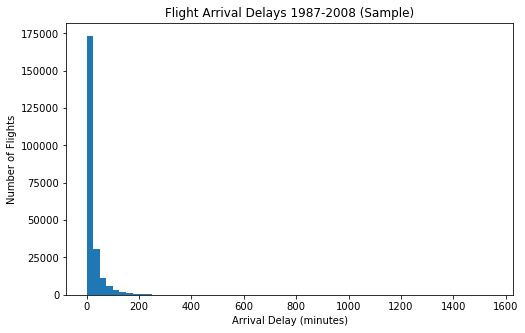

In [152]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['ArrDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'ArrDelayMinutes', bins = bins)
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Arrival Delays 1987-2008 (Sample)')
plt.show()

> There's a long tail in the distribution, so let's transform the data

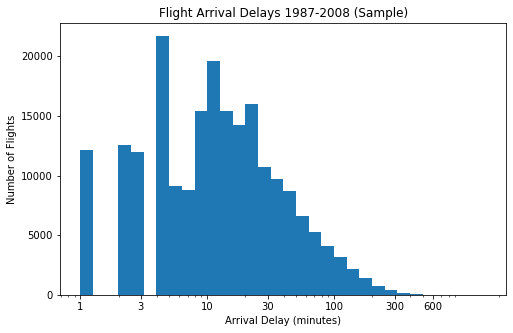

In [153]:
# let's put it on a log scale
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['ArrDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'ArrDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Arrival Delays 1987-2008 (Sample)')
plt.show()

>ArrDelayMinutes has a long-tailed distribution, with a lot of delays on the low minutes end, and few on the high minutes end. When plotted on a log-scale, the delay distribution looks *roughly* bimodal, with the highest peak between 5 and 6 minutes (over 20,000 flights, and the next highest peak between 10-15 minutes (just under 20,000 flights). 

Next up, DepDelayMinutes.

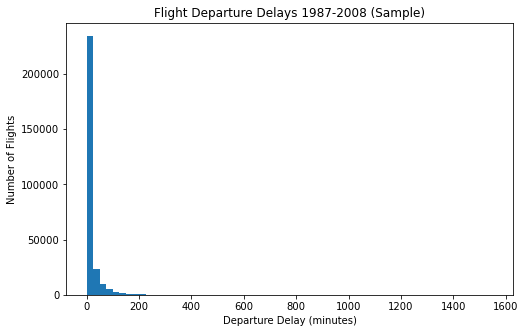

In [154]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['DepDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'DepDelayMinutes', bins = bins)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Departure Delays 1987-2008 (Sample)')
plt.show()

> Once again there's a long tail, so we'll transform the data

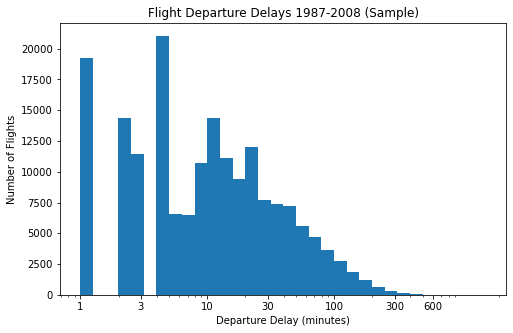

In [155]:
# let's put it on a log scale 
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['DepDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'DepDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Departure Delays 1987-2008 (Sample)')
plt.show()

>DepDelayMinutes has a long-tailed distribution similar to ArrDelayMinutes, with a lot of delays on the low minutes end, and few on the high minutes end. When plotted on a log-scale, the delay distribution looks *roughly* unimodal, with the highest peak between 5 and 6 minutes (over 20,000 flights).

Now I am curious about delays broken down by reason. We will start with Delays Due to the Carrier

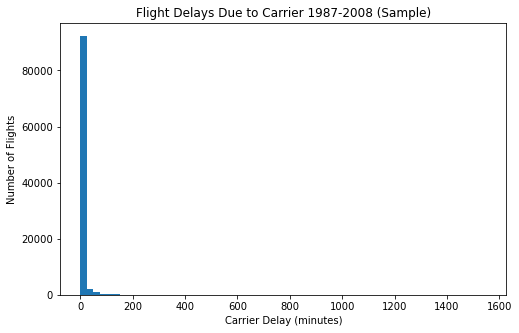

In [156]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['CarrierDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'CarrierDelayMinutes', bins = bins)
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Carrier 1987-2008 (Sample)')
plt.show()

> Once again there's a long tail in the distribution, so we'll transform the data

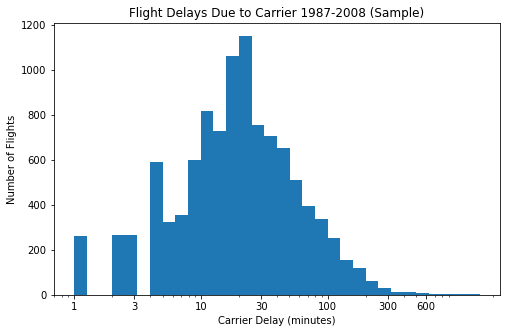

In [157]:
# let's put it on a log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['CarrierDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'CarrierDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Carrier 1987-2008 (Sample)')
plt.show()

> Carrier caused delays looks normally distributed when transformed logarithmically with the peak between 20-30 minutes (over 1,000 flights).

Next we will look at weather delays

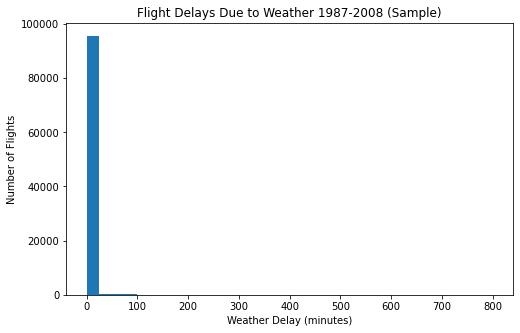

In [158]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['WeatherDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'WeatherDelayMinutes', bins = bins)
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Weather 1987-2008 (Sample)')
plt.show()

> Another long tail, let's transform

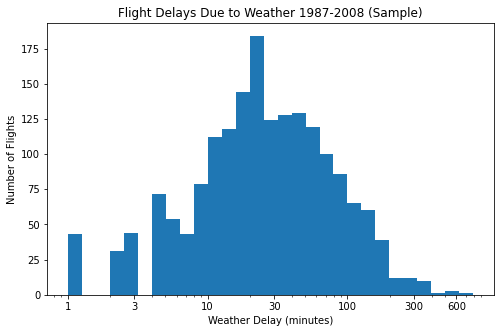

In [159]:
# let's put it on a log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['WeatherDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'WeatherDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Weather 1987-2008 (Sample)')
plt.show()

> Weather caused delays looks normally distributed when transformed logarithmically with the peak between 20-30 minutes also (over 160 flights)

Next we will look at NAS delays

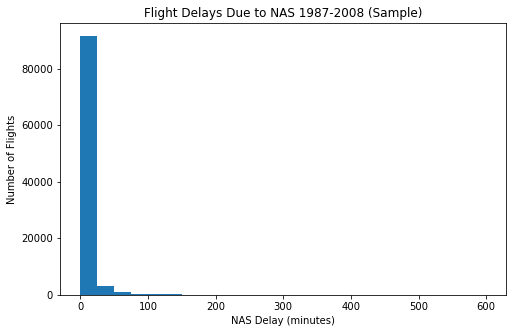

In [160]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['NASDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'NASDelayMinutes', bins = bins)
plt.xlabel('NAS Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to NAS 1987-2008 (Sample)')
plt.show()

> Let's transform

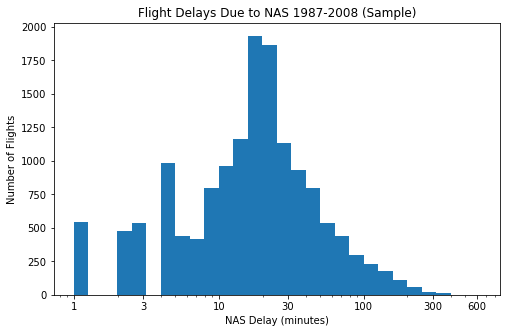

In [161]:
# log scale 
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['NASDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'NASDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('NAS Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to NAS 1987-2008 (Sample)')
plt.show()

> NAS caused delays looks *farily* normally distributed when transformed logarithmically with the peak between 15-30 minutes (just under 2,000 flights)

Next we will look at Security delays

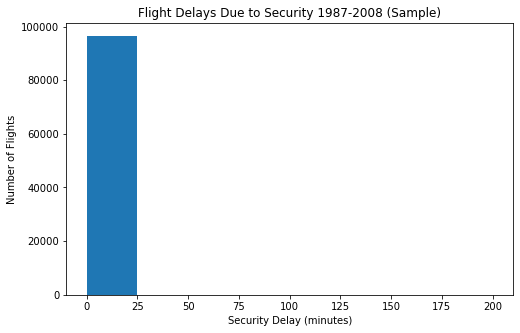

In [162]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['SecurityDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'SecurityDelayMinutes', bins = bins)
plt.xlabel('Security Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Security 1987-2008 (Sample)')
plt.show()

> This is a little interesting compared to the other charts so far

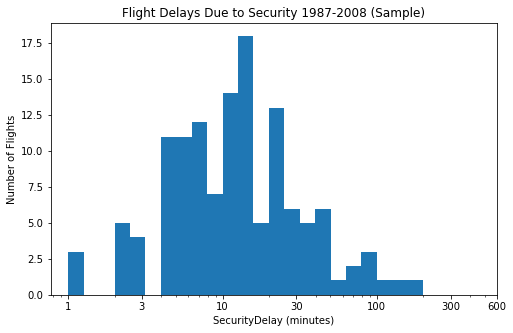

In [163]:
# there's one big cluster in the distribution, so let's put it on a log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['SecurityDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'SecurityDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('SecurityDelay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Security 1987-2008 (Sample)')
plt.show()

> Now the chart looks *roughly* normally distributed with a peak around 20 minutes (depending on the sample around 16 flights)

Let's look at Late Aircraft Arrivals

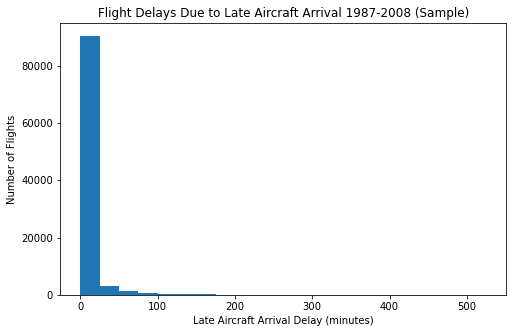

In [164]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['LateAircraftDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'LateAircraftDelayMinutes', bins = bins)
plt.xlabel('Late Aircraft Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Late Aircraft Arrival 1987-2008 (Sample)')
plt.show()

> Let's transform because we see another long tail

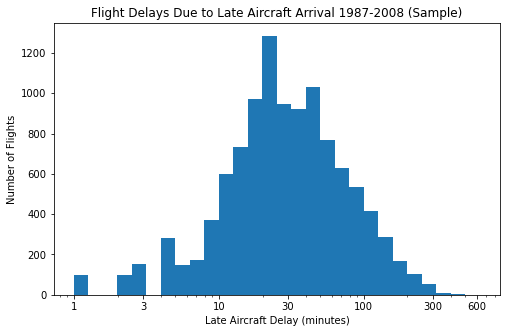

In [165]:
# transfom with log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['LateAircraftDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'LateAircraftDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Late Aircraft Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Late Aircraft Arrival 1987-2008 (Sample)')
plt.show()

> Now the chart looks *roughly* normally distributed with a peak around 20 minutes (around 1,200 flights)

While all the charts were logarithmically transformed into normal distributions that were centered roughly around 20-30 minutes, it appears that Late Arriving Aircraft and NAS were the reasons for the most flight delays with Carrier close behind, Weather was significantly less and Security was the least 

Note: the results can vary somewhat depending on the sample from the intial dataset load. 

See below

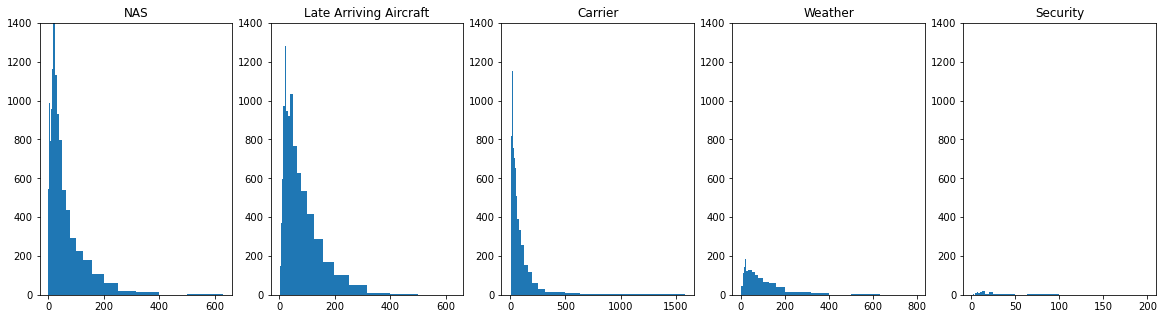

In [166]:
# Let's show these plots side-by-side to illustrate the difference in peak counts

plt.figure(figsize=[20,5])

plt.subplot(1,5,1)
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['NASDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = filtered_flight_data, x = 'NASDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('NAS')

plt.subplot(1,5,2)
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['LateAircraftDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = filtered_flight_data, x = 'LateAircraftDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Late Arriving Aircraft')

plt.subplot(1,5,3)
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['CarrierDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = filtered_flight_data, x = 'CarrierDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Carrier')

plt.subplot(1,5,4)
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['WeatherDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = filtered_flight_data, x = 'WeatherDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Weather')

plt.subplot(1,5,5)
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['SecurityDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = filtered_flight_data, x = 'SecurityDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Security');


> This made me wonder about cancellation codes, let's look a that:


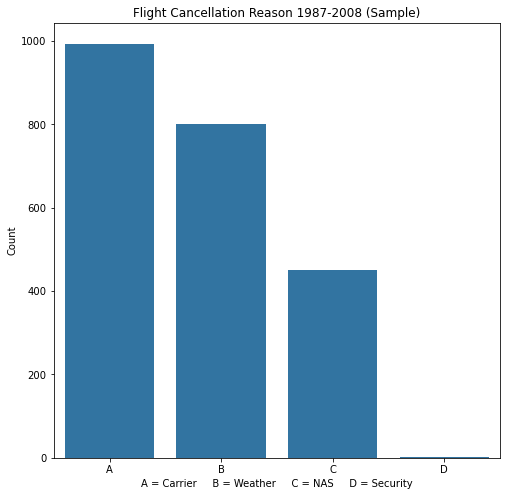

In [167]:
# NOTE: This code will result in errors when there are no cancellation codes if null ArrTime and DepTime are removed.

# Let's plot the reason for flight cancellations
default_color = sb.color_palette()[0]

# Determine descending order to make chart easier to read
code_counts = filtered_flight_data.CancellationCode.value_counts()
code_order = code_counts.index

plt.figure(figsize=[8,8])
g = sb.countplot(data = filtered_flight_data, x = 'CancellationCode', order = code_order, color = default_color);
plt.xlabel('A = Carrier     B = Weather     C = NAS     D = Security')
plt.ylabel('Count')
plt.title('Flight Cancellation Reason 1987-2008 (Sample)')
plt.show(g)

> This chart seems to show that most cancellations (vs. delays) are due to the carrier and weather

Now let's look at the percentage of cancelled flights

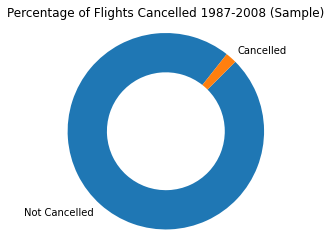

In [168]:
# Let's plot the percentage of flight cancellations
cancel_counts = filtered_flight_data.Cancelled.value_counts()
label = ['Not Cancelled', 'Cancelled']
plt.pie(cancel_counts, labels=label, startangle = 45, counterclock= False, wedgeprops={'width': 0.4});
plt.axis('square');
plt.title('Percentage of Flights Cancelled 1987-2008 (Sample)');

> Very few flights are cancelled as a percentage of total flights 

Let's look at Diverted Flights

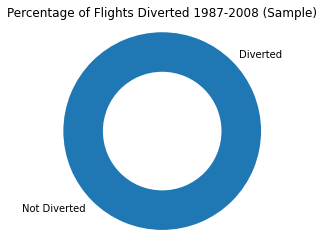

In [169]:
# Let's plot the percentage of diverted flights
diverted_counts = filtered_flight_data.Diverted.value_counts()
label = ['Not Diverted', 'Diverted']
plt.pie(diverted_counts, labels=label, startangle = 45, counterclock= False, wedgeprops={'width': 0.4});
plt.axis('square');
plt.title('Percentage of Flights Diverted 1987-2008 (Sample)');

> An even smaller percentage of flights get diverted

> Let's look at which airports have the most flights - Limit to Top 20 to manageable

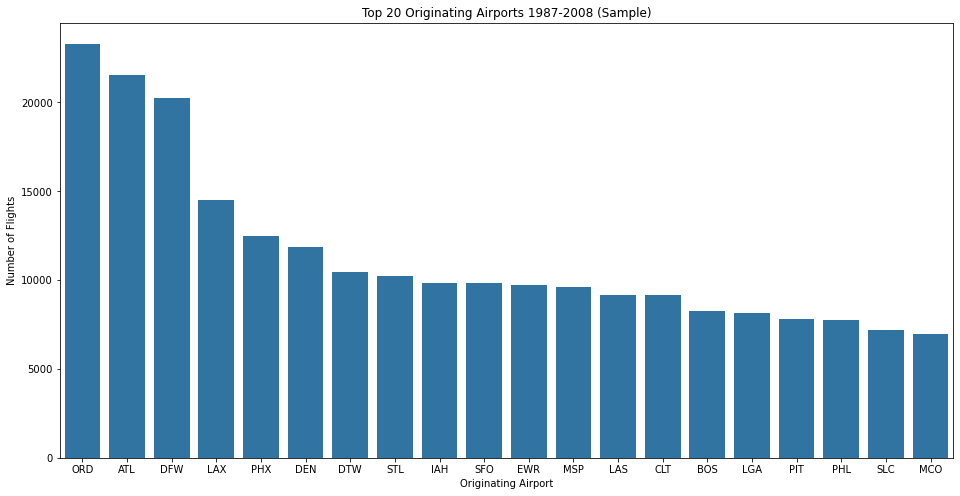

In [170]:
# Plot Origin airports
default_color = sb.color_palette()[0]

# Determine descending order to make chart easier to read
origin_counts = filtered_flight_data.Origin.value_counts().nlargest(20)
origin_order = origin_counts.index

plt.figure(figsize=[16,8])
g = sb.countplot(data = filtered_flight_data, x = 'Origin', order = origin_order, color = default_color);
plt.xlabel('Originating Airport')
plt.ylabel('Number of Flights')
plt.title('Top 20 Originating Airports 1987-2008 (Sample)')
plt.show(g)

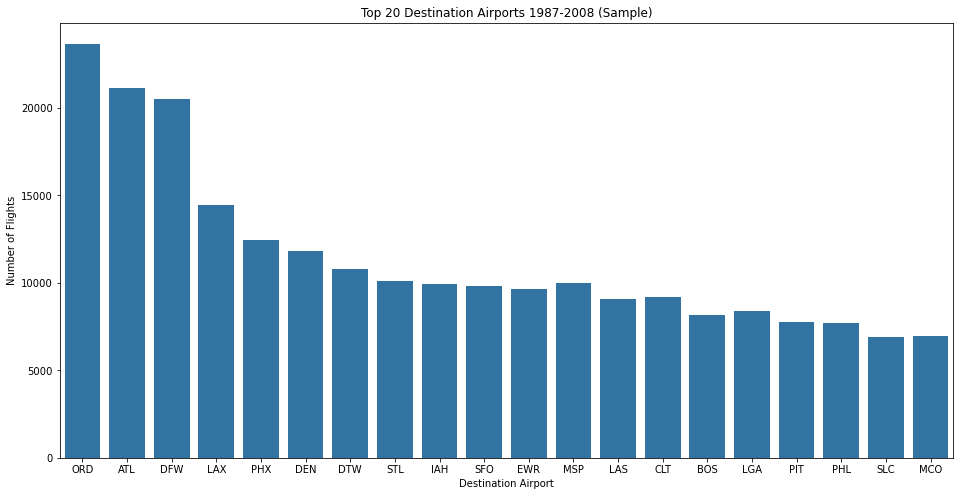

In [171]:
# Plot Destination airports
default_color = sb.color_palette()[0]

# Determine descending order to make chart easier to read
dest_counts = filtered_flight_data.Dest.value_counts().nlargest(20)
dest_order = dest_counts.index

plt.figure(figsize=[16,8])
g = sb.countplot(data = filtered_flight_data, x = 'Dest', order = origin_order, color = default_color);
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.title('Top 20 Destination Airports 1987-2008 (Sample)')
plt.show(g)

> We can see that the Top Airports are the same for both Origin and Dest, which makes sense because flights that arrive at an airport will later also depart from that same airport. Top 5 (in order) are: Chicago O'Hare, Atlanta, Dallas, LA, Phoenix

> Now let's look at the number of flights by year 

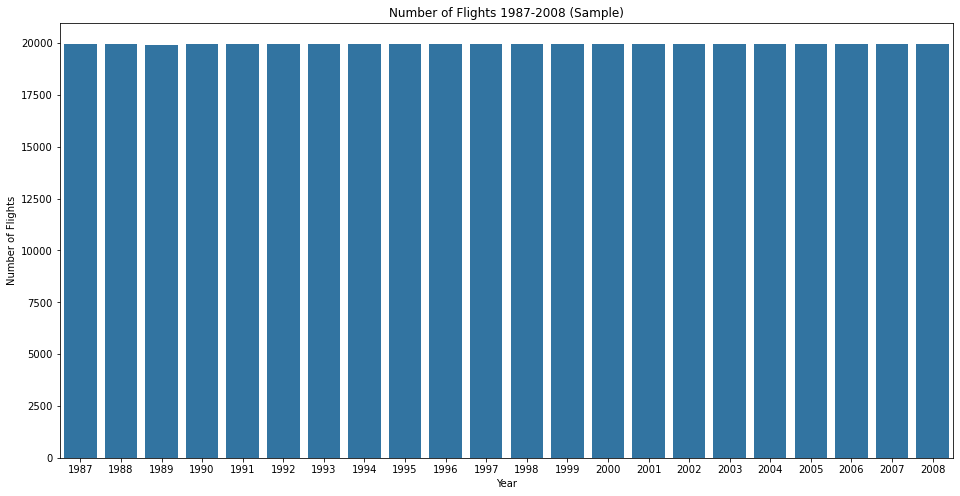

In [172]:
# Plot Flights by Year
default_color = sb.color_palette()[0]

plt.figure(figsize=[16,8])
g = sb.countplot(data = filtered_flight_data, x = 'Year', color = default_color);
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.title('Number of Flights 1987-2008 (Sample)')
plt.show(g)

> THIS RESULT IS NOT VALID SINCE WE TOOK A SUBSET OF EACH YEAR. THE NUMBER OF FLIGHTS PER YEAR WILL ALWAYS BE 20,000

> Let's look at the distance flown

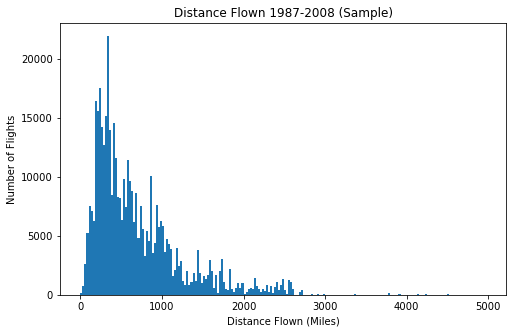

In [173]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, filtered_flight_data['Distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'Distance', bins = bins)
plt.xlabel('Distance Flown (Miles)')
plt.ylabel('Number of Flights')
plt.title('Distance Flown 1987-2008 (Sample)')
plt.show()

> This has a bit of a tail, let's transform the data

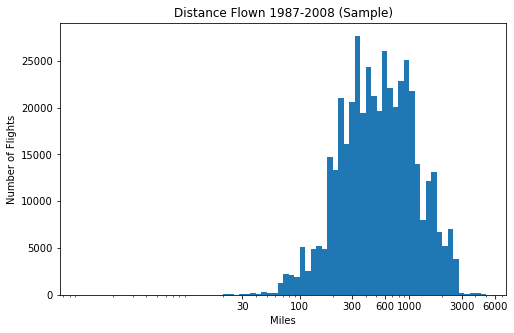

In [174]:
# let's put it on a log scale instead
log_binsize = .05
bins = 10 ** np.arange(0, np.log10(filtered_flight_data['Distance'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = filtered_flight_data, x = 'Distance', bins = bins)
plt.xscale('log')
plt.xticks([30, 100, 300, 600, 1000, 3000, 6000], [30 ,100, 300, 600, 1000, 3000, 6000])
plt.title('Distance Flown 1987-2008 (Sample)')
plt.xlabel('Miles')
plt.ylabel('Number of Flights')
plt.show()

#### NOT SURE WHY THERE ARE 0'S IN ARR AND DEP Time_dt when the arr/dep time were not null?

In [176]:
filtered_flight_data[((filtered_flight_data['ArrTime_dt'].astype(str) =='00:00:00') & (filtered_flight_data['DepTime_dt'].astype(str) =='00:00:00')) & ((filtered_flight_data['DepTime'].notnull()) | (filtered_flight_data['ArrTime'].notnull()))]


,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt,ScheduledDepTime_dt,ScheduledArrTime_dt
1120,1990,4,22,7,900.0,900.0,1020.0,1020.0,WN,404,NaN,80.0,80.0,NaN,0.0,0.0,HOU,TUL,453.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:00:00
2032,1990,2,12,1,700.0,700.0,900.0,900.0,AS,193,NaN,120.0,120.0,NaN,0.0,0.0,SFO,SEA,679.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:00:00
2376,1990,11,5,1,10.0,10.0,30.0,33.0,EA,479,NaN,20.0,23.0,NaN,-3.0,0.0,FLL,MIA,21.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:33:00
2590,1990,4,16,1,700.0,700.0,900.0,915.0,US,2227,NaN,120.0,135.0,NaN,-15.0,0.0,PIT,TPA,873.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,09:15:00
2858,1990,11,10,6,1000.0,1000.0,1040.0,1039.0,DL,169,NaN,40.0,39.0,NaN,1.0,0.0,PWM,BOS,95.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435947,1989,10,20,5,900.0,900.0,1040.0,1030.0,UA,65,NaN,160.0,150.0,NaN,10.0,0.0,LGA,ORD,733.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:00:00
436851,1989,4,21,5,800.0,800.0,1050.0,1051.0,CO,680,NaN,170.0,171.0,NaN,-1.0,0.0,FLL,EWR,1065.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:51:00
438124,1989,11,12,7,1010.0,1010.0,1030.0,1030.0,WN,692,NaN,80.0,80.0,NaN,0.0,0.0,SAT,ELP,496.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:00:00
438282,1989,2,24,5,700.0,700.0,1040.0,1035.0,NW,500,NaN,160.0,155.0,NaN,5.0,0.0,MSP,LGA,1020.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:00:00,00:00:00,00:00:00,00:35:00


In [190]:
# Create columns for the hour
filtered_flight_data['Arr_hour'] = pd.to_datetime(filtered_flight_data['ArrTime_dt'], format='%H:%M:%S').dt.hour
filtered_flight_data['Dep_hour'] = pd.to_datetime(filtered_flight_data['DepTime_dt'], format='%H:%M:%S').dt.hour
filtered_flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,ArrTime_dt,DepTime_dt,ScheduledDepTime_dt,ScheduledArrTime_dt,Arr_hour,Dep_hour
0,1990,8,11,6,1612.0,1525.0,1747.0,1710.0,US,506,NaN,95.0,105.0,NaN,37.0,47.0,PWM,PIT,555.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,17:47:00,16:12:00,15:25:00,00:17:00,17,16
1,1990,11,28,3,1621.0,1620.0,1737.0,1724.0,US,473,NaN,76.0,64.0,NaN,13.0,1.0,CLE,IND,261.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,17:37:00,16:21:00,00:16:00,17:24:00,17,16
2,1990,7,15,7,617.0,617.0,709.0,707.0,TW,390,NaN,52.0,50.0,NaN,2.0,0.0,PIA,STL,137.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,00:09:00,06:17:00,06:17:00,00:07:00,0,6
3,1990,10,6,6,1221.0,1222.0,1245.0,1250.0,DL,1617,NaN,84.0,88.0,NaN,-5.0,-1.0,SLC,PHX,507.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,12:45:00,12:21:00,12:22:00,00:12:00,12,12
4,1990,1,24,3,2101.0,2051.0,2231.0,2223.0,AA,950,NaN,90.0,92.0,NaN,8.0,10.0,RDU,PVD,566.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,22:31:00,00:21:00,00:51:00,22:23:00,22,0


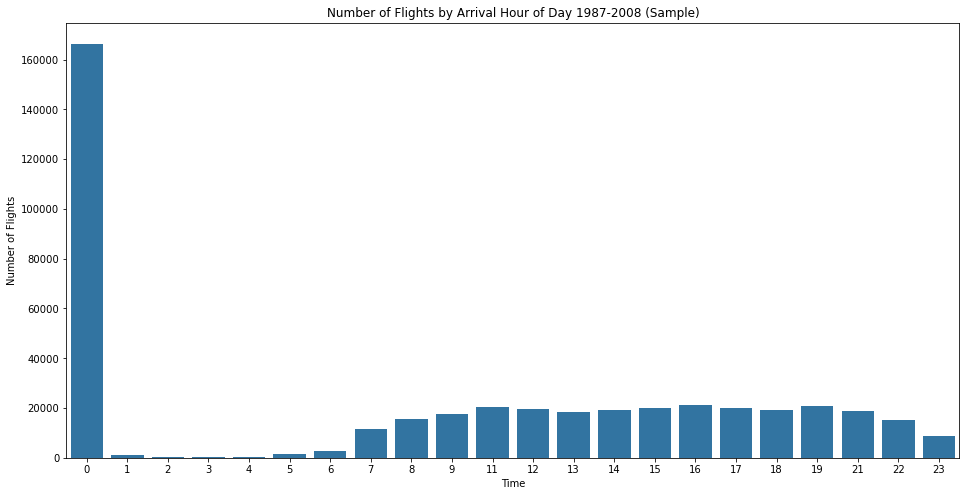

In [192]:
# Let Plot Flights by Hour of Day
default_color = sb.color_palette()[0]

plt.figure(figsize=[16,8])
g = sb.countplot(data = filtered_flight_data, x = 'Arr_hour', color = default_color,);
plt.xlabel('Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Arrival Hour of Day 1987-2008 (Sample)')
plt.show(g)

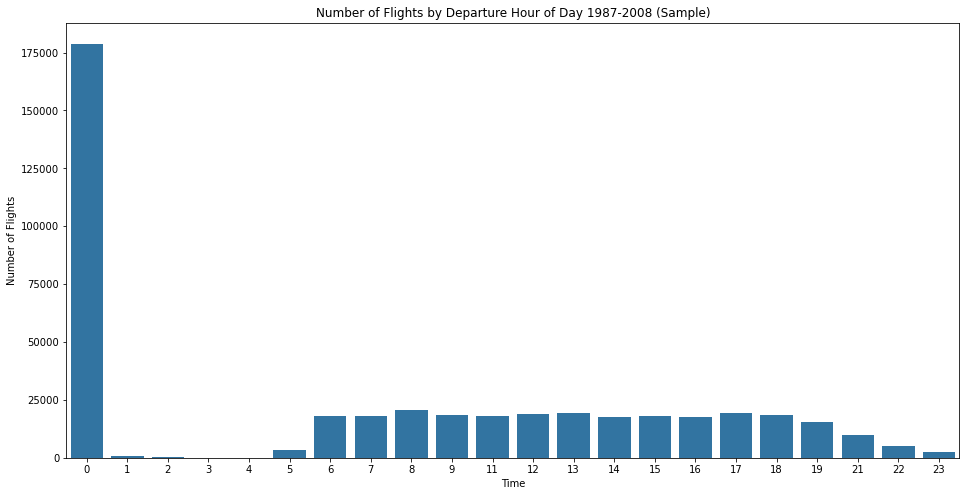

In [193]:
# Let Plot Flights by Hour of Day
default_color = sb.color_palette()[0]

plt.figure(figsize=[16,8])
g = sb.countplot(data = filtered_flight_data, x = 'Dep_hour', color = default_color,);
plt.xlabel('Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Departure Hour of Day 1987-2008 (Sample)')
plt.show(g)

> The distribution looks roughly normal and peaks around 300-1000 miles

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All the various delay related variables had a wide range of values so I performed log transformations on all of them. The result was basically normal distributions throughout with peak values around 20 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Just about all the delay related variables were right-skewed, but Security delays were looked more like a bar chart with a single large cluster of values  before transformation. 

> After initially dropping null values for ArrTime and DepTime in an attempt to change the dtype to dt.time, it became apparent that information on cancellations (cancellation codes, number of cancellations and diversions) was lost. So instead, we replaced nulls in ArrTime and DepTime with 0000. An identical departure and arrival time is impossible so this indicates a cancelled flight. We also cleaned up all the arrival and departure related time variables and changed them to dtype datetime.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

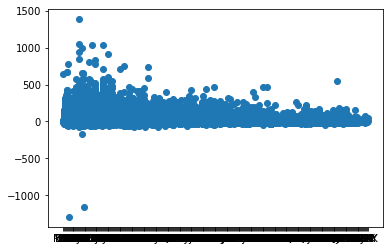

In [56]:
plt.scatter(data=combined_flight_data, x='Dest', y='ArrDelayMinutes');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

